# Data analysis: Weather
In the file `weather_dataset.csv` you find weather data for various cities. It is up to you to clean and analyse this data. Use the provided code fields under the tasks to write down your code. 

Import the necessary packages.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

* Import the weather dataset into a DataFrame named `df_weather`
* Inspect the DataFrame by showing the first 10 rows (do not use slicing for this).


In [2]:
#Import and inspect
file_path = "weather_dataset.csv"
data = pd.read_csv(file_path)
data.head(10)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
5,20000106,1,3,0.85,1.0244,0.56,0.00,5.7,4.2,1.9,...,-0.6,4.0,3.4,0.92,1.0209,0.55,0.20,7.1,3.5,10.7
6,20000107,1,8,0.84,1.0267,0.20,0.00,0.0,4.7,1.8,...,1.7,4.1,2.8,0.96,1.0258,0.27,0.00,6.0,3.3,8.8
7,20000108,1,4,0.79,1.0248,0.54,0.00,4.3,5.6,4.1,...,3.5,6.4,3.6,0.97,1.0210,0.18,0.14,8.2,5.3,11.0
8,20000109,1,8,0.88,1.0243,0.11,0.65,0.0,4.6,3.8,...,3.3,5.1,3.0,0.91,1.0280,0.43,0.02,5.6,3.7,7.6
9,20000110,1,8,0.91,1.0337,0.06,0.09,0.0,2.4,1.4,...,0.0,5.5,1.9,0.94,1.0369,0.58,0.04,1.8,-1.5,5.0


* Change the dates in the DATE column to pandas datetime objects.
* Only include the rows with data from 2009


In [3]:
#datetime objects, year 2009
data_from_2009 = []
index = 0
for row in data["DATE"]:
    row_string = str(row)
    if row_string[:4] == "2009":
        data_from_2009.append(data.loc[index])
    index+=1
df_2009 = pd.DataFrame(data_from_2009)
df_2009.head(10)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
3288,20090101.0,1.0,4.0,0.84,1.0284,0.63,0.00,7.1,1.5,0.2,...,-6.0,-1.9,4.9,0.92,1.0259,0.22,0.00,0.6,-0.5,1.7
3289,20090102.0,1.0,8.0,0.89,1.0262,0.07,0.00,0.0,-1.0,-1.8,...,-8.1,-4.6,4.9,0.93,1.0245,0.08,0.00,-0.4,-1.1,0.4
3290,20090103.0,1.0,5.0,0.72,1.0263,0.50,0.00,2.9,-3.1,-6.2,...,-5.8,-2.7,6.0,0.79,1.0236,0.69,0.00,-0.1,-1.4,1.1
3291,20090104.0,1.0,4.0,0.75,1.0239,0.62,0.00,5.4,-3.7,-6.5,...,-10.8,-5.8,1.9,0.86,1.0231,0.68,0.00,-2.4,-5.3,0.5
3292,20090105.0,1.0,8.0,0.84,1.0197,0.28,0.05,0.0,-4.1,-6.4,...,-12.6,-8.3,2.0,0.92,1.0181,0.18,0.16,-4.4,-6.9,-1.9
3293,20090106.0,1.0,8.0,0.86,1.0196,0.13,0.05,0.0,-4.2,-5.3,...,-8.7,-0.2,4.0,0.82,1.0210,0.66,0.00,-4.9,-8.2,-1.6
3294,20090107.0,1.0,7.0,0.84,1.0223,0.17,0.00,0.0,-5.7,-9.8,...,-7.8,0.3,2.8,0.71,1.0239,0.78,0.00,-6.2,-13.0,0.7
3295,20090108.0,1.0,3.0,0.82,1.0278,0.66,0.00,6.3,-6.4,-10.6,...,-9.7,1.4,5.2,0.82,1.0249,0.62,0.00,-1.4,-3.5,0.6
3296,20090109.0,1.0,0.0,0.87,1.0303,0.64,0.00,6.3,-6.1,-9.6,...,1.0,5.8,2.1,0.80,1.0267,0.74,0.00,-5.0,-9.0,-1.0
3297,20090110.0,1.0,0.0,0.84,1.0311,0.67,0.00,6.1,-5.1,-9.4,...,-0.1,3.2,2.5,0.80,1.0281,0.75,0.00,-3.6,-8.5,1.2


* Remove the rows with NaN values.

In [4]:
#NaN
data.dropna()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


* Create 4 different DataFrames, one for each of the following cities: Basel, Oslo, Roma and Maastricht. Name them `df_Basel`, `df_Oslo`, `df_Roma` and `df_Maastricht` respectively.
* Each dataframe should include the columns with the dates and months and the columns with the data of the corresponding city. 



In [5]:
# List of cities to extract data for
cities = ["BASEL", "OSLO", "ROMA", "MAASTRICHT"]

# Create a dictionary to store DataFrames
city_dataframes = {city: data[['DATE', 'MONTH'] + [col for col in data.columns if col.startswith(city)]] for city in cities}

# Access individual DataFrames
df_Basel = city_dataframes["BASEL"]
df_Oslo = city_dataframes["OSLO"]
df_Roma = city_dataframes["ROMA"]
df_Maastricht = city_dataframes["MAASTRICHT"]

df_Maastricht.head(10)

,DATE,MONTH,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_wind_gust,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max
0,20000101,1,8,3.1,7.0,0.98,1.0251,0.06,0.17,0.0,5.6,4.1,6.9
1,20000102,1,7,3.8,9.0,0.95,1.0286,0.14,0.00,0.0,6.2,4.2,7.5
2,20000103,1,7,7.4,14.0,0.87,1.0236,0.15,0.02,0.9,6.8,6.1,7.9
3,20000104,1,8,7.2,15.0,0.92,1.0165,0.07,1.33,0.0,7.3,6.1,9.0
4,20000105,1,4,4.1,10.0,0.87,1.0205,0.44,0.00,6.2,5.2,0.6,8.4
5,20000106,1,6,5.3,12.0,0.86,1.0178,0.33,0.26,2.7,7.3,3.3,10.3
6,20000107,1,6,6.0,14.0,0.86,1.0223,0.32,0.00,3.3,6.6,4.6,7.8
7,20000108,1,7,4.8,11.0,0.91,1.0196,0.19,0.09,0.9,5.9,4.6,7.3
8,20000109,1,6,1.8,4.0,0.95,1.0261,0.36,0.00,3.4,4.0,-0.4,6.1
9,20000110,1,7,1.7,4.0,1.00,1.0366,0.21,0.00,0.0,-0.3,-3.1,2.1


### Maastricht
Plot a figure displaying following information of the temperature measurements over time done in Maastricht:
* Temperature in °C is displayed on the y-axis
* Mean temperature in orange
* Max temperature in red
* Min temperature in blue
* Display a legend with appropriate labels, indicating which data is shown
* Ensure proper axis labels and a title are included
* On the x-axis, ensure there are indications for every month, labeled with the abbreviation of the month in English (Jan, Feb, March etc.) 

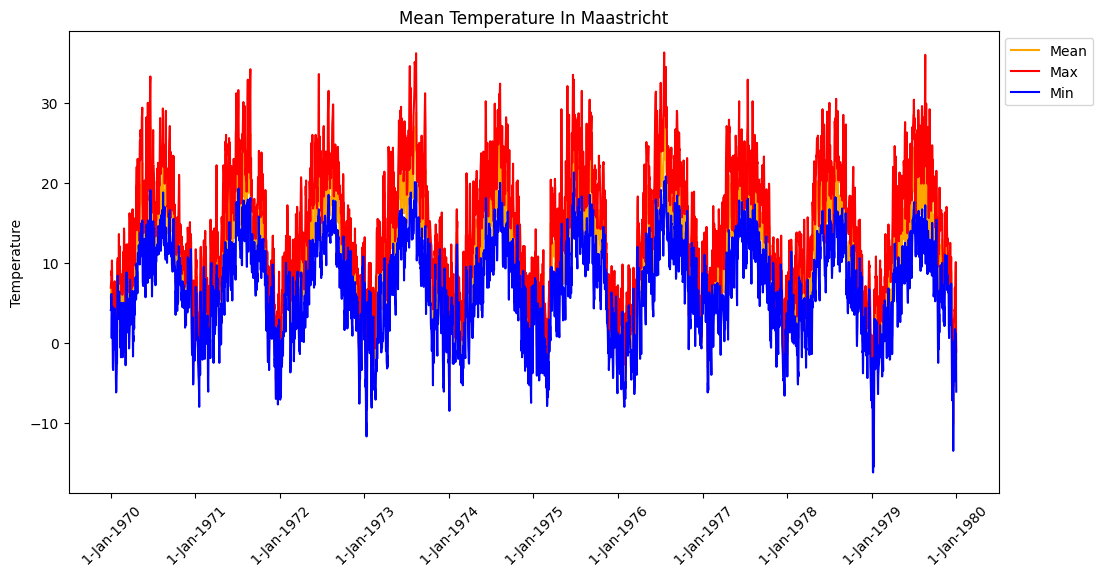

In [67]:
#Maastricht
plt.figure(figsize=(12, 6))

plt.plot(df_Maastricht.index, df_Maastricht["MAASTRICHT_temp_mean"], label="Mean", color="orange")
plt.plot(df_Maastricht.index, df_Maastricht["MAASTRICHT_temp_max"], label="Max", color="red")
plt.plot(df_Maastricht.index, df_Maastricht["MAASTRICHT_temp_min"], label="Min", color="blue")

plt.title("Mean Temperature In Maastricht")
plt.ylabel("Temperature")

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%v"))
plt.xticks(rotation=45)

plt.show()


### Mean temperatures
Create a new graph and plot the mean temperatures over time of the cities for which you created seperate dataframes. Temperatures are in degrees Celcius and displayed on the y-axis.
* Maastricht in orange
* Roma in red
* Basel in green
* Oslo in blue
* Display a legend with appropriate labels so it is clear what data is shown
* Ensure proper axis labels and a title are included
* On the x-axis, ensure indications for every month, labeled with the abbreviation of the month in English (Jan, Feb, March etc.) 
* Show a grid 

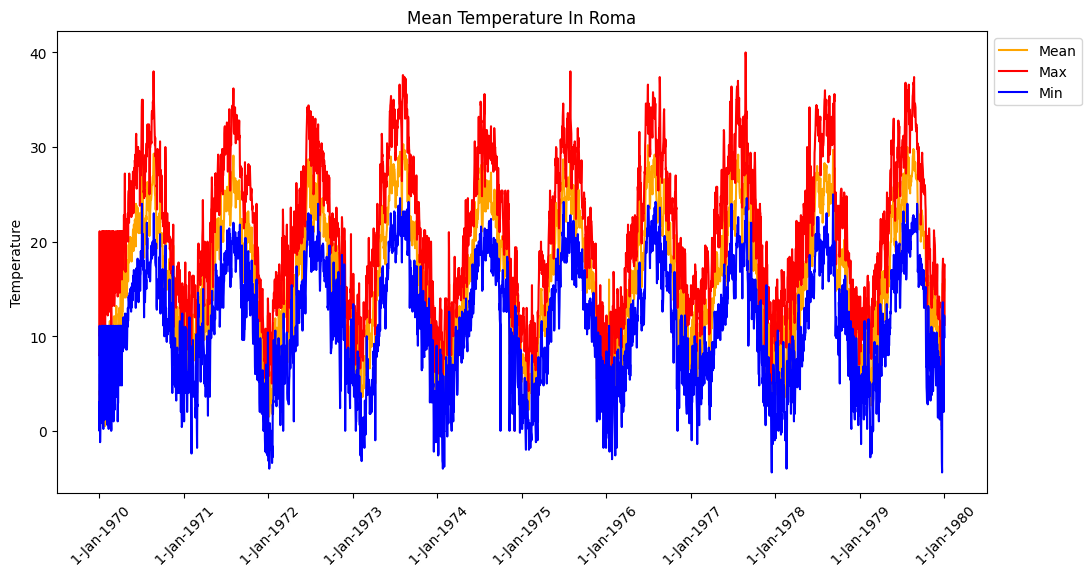

In [73]:
#Mean temperatures
plt.figure(figsize=(12, 6))

plt.plot(df_Roma.index, df_Roma["ROMA_temp_mean"], label="Mean", color="orange")
plt.plot(df_Roma.index, df_Roma["ROMA_temp_max"], label="Max", color="red")
plt.plot(df_Roma.index, df_Roma["ROMA_temp_min"], label="Min", color="blue")

plt.title("Mean Temperature In Roma")
plt.ylabel("Temperature")

plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%v"))
plt.xticks(rotation=45)

plt.show()

___

Check your work thouroughly and ensure you did all the tasks.  
There are no tests provided for this data analysis exercise. Ensure you used the right names. 

___
